In [1]:
# importar bibliotecas
import pandas as pd
import numpy as np
#import os
import matplotlib.pyplot as plt
from pathlib import Path
#import seaborn as sns
%matplotlib inline
import os

## 1 - Importação das projeções

* ### 1.1 - Importação de tabelas de projeção do IBGE (2010-2060)

* Origem da tabela de projeção do IBGE
* Projeções da População do Brasil e Unidades da Federação por sexo e idade: 2010-2060

https://www.ibge.gov.br/novo-portal-destaques/27470-projecao-da-populacao-das-unidades-da-federacao-por-sexo-e-idade-simples.html
https://www.ibge.gov.br/estatisticas/sociais/populacao/9109-projecao-da-populacao.html?=&t=resultados
  

In [2]:
# Pasta corrente
pasta = os.getcwd()
proj_ibge = Path.cwd() / 'dados' / 'Tabuas_Mortalidade 2010-2060.xls'
pasta_graficos = os.path.join(pasta, "graficos2")

* #### 1.1.1  - Leitura do arquivo com as comutações e da projeções das tábuas IBGE

In [3]:
colunas = ['Idade', 'nMx', 'nqx', 'nDx', 'npx', 'lx', 'nLx', 'Tx', 'ex']

df_ibge=pd.read_excel(proj_ibge,
                      names = colunas,
                      sheet_name = "Brasil",
                      skiprows = 9,
                      usecols = "U:AC")

In [4]:
df_ibge.head().append(df_ibge.tail())

,Idade,nMx,nqx,nDx,npx,lx,nLx,Tx,ex
0,0,0.01749,0.0172159,1721.59,0.982784,100000,98453.4,7.3857e+06,73.857
1,1,0.00066,0.00263212,258.681,0.997368,98278.4,392466,7.28725e+06,74.149
2,5,0.0003,0.00148481,145.541,0.998515,98019.7,489735,6.89478e+06,70.3407
3,10,0.00036,0.00178741,174.941,0.998213,97874.2,488934,6.40505e+06,65.4416
4,15,0.0012,0.00598205,584.442,0.994018,97699.2,487035,5.91611e+06,60.5543
1269,90,0.14328,1,31795.2,0,31795.2,221904,221904,6.97917
1270,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1271,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1273,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# limpeza da importação: primeira: deleta as linhas com NaN. Segunda: deleta as linhas onde a coluna Idade contem Ano: e idade
df_ibge.dropna(axis=0, how='all', inplace=True)
df_ibge = df_ibge[~df_ibge['Idade'].isin(['Ano:','Idade'])]

In [6]:
df_ibge.reset_index(drop=True, inplace=True)

In [7]:
# Teste: O valor 20, no parâmetro repeats representa o range das idades: 0, 1, 5, 10, 15, --5 em 5 até,....90). 
y = np.repeat(np.arange(2010, 2061), repeats=20)
y

array([2010, 2010, 2010, ..., 2060, 2060, 2060])

In [8]:
# pd.DataFrame(np.array(predict_res).reshape(-1)) # colocar a serie em uma unica coluna

In [9]:
df_ibge = df_ibge.assign(ano=np.repeat(np.arange(2010, 2061), repeats=20))

In [10]:
df_ibge.head().append(df_ibge.tail())

,Idade,nMx,nqx,nDx,npx,lx,nLx,Tx,ex,ano
0,0,0.01749,0.0172159,1721.59,0.982784,100000,98453.4,7.3857e+06,73.857,2010
1,1,0.00066,0.00263212,258.681,0.997368,98278.4,392466,7.28725e+06,74.149,2010
2,5,0.0003,0.00148481,145.541,0.998515,98019.7,489735,6.89478e+06,70.3407,2010
3,10,0.00036,0.00178741,174.941,0.998213,97874.2,488934,6.40505e+06,65.4416,2010
4,15,0.0012,0.00598205,584.442,0.994018,97699.2,487035,5.91611e+06,60.5543,2010
1015,70,0.0212,0.100683,8147.73,0.899317,80924.2,384252,1.41362e+06,17.4685,2060
1016,75,0.0331,0.152838,11123,0.847162,72776.5,336075,1.02937e+06,14.1443,2060
1017,80,0.05164,0.228689,14099.5,0.771311,61653.5,273019,693296,11.245,2060
1018,85,0.07944,0.331388,15758.8,0.668612,47554,198373,420277,8.83789,2060
1019,90,0.14328,1,31795.2,0,31795.2,221904,221904,6.97917,2060


In [11]:
df_ibge_qx = df_ibge
df_ibge_qx = df_ibge.loc[:,['Idade', 'nqx', 'ano']].copy()

In [12]:
df_ibge_qx.head()

,Idade,nqx,ano
0,0,0.0172159,2010
1,1,0.00263212,2010
2,5,0.00148481,2010
3,10,0.00178741,2010
4,15,0.00598205,2010


In [13]:
df_ibge_qx.shape

(1020, 3)

In [14]:
df_ibge_qx_fim = df_ibge_qx.pivot(index='Idade', columns='ano', values='nqx').reset_index()
df_ibge_qx_fim.head()

ano,Idade,2010,2011,2012,2013,2014,2015,2016,2017,2018,...,2051,2052,2053,2054,2055,2056,2057,2058,2059,2060
0,0,0.0172159,0.0164252,0.0156942,0.0150206,0.014398,0.0138234,0.0132939,0.0128053,0.0123547,...,0.00719628,0.00715703,0.00711811,0.00708254,0.00704982,0.00701786,0.00698865,0.0069612,0.00693659,0.00691366
1,1,0.00263212,0.00255453,0.00248562,0.00241037,0.00234841,0.00228361,0.00221972,0.00216518,0.00210572,...,0.00117746,0.00116475,0.00115306,0.00114302,0.00113401,0.00112804,0.00110962,0.00110253,0.00109425,0.00108809
2,5,0.00148481,0.00144942,0.00140927,0.00137761,0.00134216,0.00131134,0.00127463,0.00124556,0.00121134,...,0.000701658,0.00068318,0.000676231,0.000669555,0.000660518,0.000657349,0.000651243,0.000647532,0.00064246,0.000638036
3,10,0.00178741,0.00174617,0.00169749,0.00165701,0.00161777,0.00157513,0.00153934,0.00149668,0.00146391,...,0.000815335,0.000809178,0.000803355,0.000798046,0.000792569,0.000787275,0.00078089,0.000772159,0.000764941,0.000755369
4,15,0.00598205,0.00583226,0.00568119,0.00554143,0.00540222,0.00527262,0.00514837,0.00503363,0.00491949,...,0.00291406,0.0028884,0.00286412,0.0028494,0.00281905,0.00279844,0.00277979,0.00276266,0.00274051,0.00272787


* #### 1.1.2  - Expectativa de vida ao nascer tábua do IBGE

In [15]:
# Expectativa de vida:
df_ibge_ex = df_ibge.loc[:,['Idade', 'ex', 'ano']].copy()
# Ao nascer:
df_ibge_ex0 = df_ibge_ex[(df_ibge_ex['Idade']==0) & (df_ibge_ex['ano']>=2019)& (df_ibge_ex['ano']<=2050)]

In [16]:
df_ibge_ex0.head()

,Idade,ex,ano
180,0,76.501,2019
200,0,76.7415,2020
220,0,76.9722,2021
240,0,77.1917,2022
260,0,77.4024,2023


## 2 - Comutações Atuariais para as projeções futuras - Funções Comuns para Lee-Carter e LSTM

Obs.: https://www.mortality.org/

Tabela ambos os sexos: USA

#### colunas:
1. Year: Ano da tábua;
2. Age: idade da pessoa;
3. mx: taxa central de mortalidade na idade x;
4. qx: probabilidade de morte na idade x;
5. ax: anuidade;
6. lx: número de vivos na idade x;
7. dx: número de mortos na idade x;
8. Lx: Pessoas vivas na metade da idade x;
9. Tx: Quantidade de existencia na idade x. Representa o somatório dos anos vividos pelas pessoas componentes de um grupo de idade x até o instante de sua extinção. Em outras palavras, é o acompanhamento, ano a ano, de um grupo até sua extinção;
10. Ex: Expectativa de vida na idade x.


In [17]:
# FUNÇÕES ATUARIAIS
# CRIAR FUNÇÃO COM AS FORMULAS ATUARIAIS, A PARTIR DOS qx's para submeter os qx, Lee-Carter, LSTM e LSTM Bi-Direcional
def comutacao():
    lx = []
    dx = []
    Lx = []
    Tx = []
    expx = []
    
    lx.append(100000.0)
    
    for idade in range(0, w):
        dx.append(qx[idade]*lx[idade])  # dx = qx[idade]*lx[idade]/1000.0. TESTE: TIREI O 1000
        lx.append(lx[idade]-dx[idade])  # lx[idade+1] = lx[idade] - dx[idade]

    for idade in range(0, w):
        if dx[idade] !=0.0:
            # Lx[idade] = lx[idade] + lx[idade+1]/2
            Lx.append((lx[idade] + lx[idade+1])/2)
        else:
            Lx.append(0.0)
    
    for idade in range(0, w):
        if lx[idade] != 0.0:
            # Tx = sum(Lx[idade:])
            Tx.append(sum(Lx[idade:]))
            # exp = Tx[idade]/lx[idade]
            expx.append(Tx[idade]/lx[idade])
        else:
            Tx.append(0.0)
            expx.append(0.0)

    return idade, qx, dx, lx, Lx, Tx, expx

In [18]:
# Função para unir as listas em linha
def unirSeries(df, explode):
    idx = df.index.repeat(df[explode[0]].str.len())
    df1 = pd.concat([
        pd.DataFrame({x: np.concatenate(df[x].values)}) for x in explode], axis=1)
    df1.index = idx

    return df1.join(df.drop(explode, 1), how='left')

## 3 - Continuação das importações das projeções

* ### 3.1 - Importação dos resultados - Método Lee-Carter

- Código de Origem: 2-expectativa_vida_lee-carter_model.ipynb

* #### 3.1.1  - Leitura do arquivo da projeção pelo Método Lee-Carter

In [19]:
# Lee-carter
'leecarter_previsao.csv'
proj_leecarter = Path.cwd() / 'resultados' / 'leecarter_previsao_demography.csv'

In [20]:
df_leecarter = pd.read_csv(proj_leecarter, index_col=[0])
print(df_leecarter.shape)
df_leecarter.head()

(111, 30)


,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,...,2040,2041,2042,2043,2044,2045,2046,2047,2048,2049
0,0.005702,0.005551,0.005395,0.005241,0.005091,0.004945,0.004803,0.004665,0.004531,0.004401,...,0.003195,0.003103,0.003014,0.002927,0.002843,0.002762,0.002682,0.002605,0.002531,0.002458
1,0.000357,0.000346,0.000334,0.000323,0.000312,0.000301,0.000291,0.000281,0.000271,0.000262,...,0.000178,0.000172,0.000166,0.000160,0.000155,0.000150,0.000144,0.000139,0.000135,0.000130
2,0.000250,0.000243,0.000236,0.000229,0.000222,0.000215,0.000208,0.000202,0.000196,0.000190,...,0.000134,0.000130,0.000126,0.000122,0.000119,0.000115,0.000111,0.000108,0.000105,0.000102
3,0.000193,0.000187,0.000182,0.000176,0.000171,0.000166,0.000161,0.000156,0.000151,0.000147,...,0.000105,0.000102,0.000099,0.000096,0.000093,0.000090,0.000087,0.000085,0.000082,0.000080
4,0.000155,0.000151,0.000147,0.000142,0.000138,0.000134,0.000130,0.000126,0.000122,0.000118,...,0.000084,0.000082,0.000079,0.000077,0.000075,0.000072,0.000070,0.000068,0.000066,0.000064


* #### 3.1.2  - Expectativa de vida ao nascer: Método Lee-Carter

In [21]:
# FUNÇÕES ATUARIAIS
vetor_dados = []
dados_lee = [] # np.empty((8,0)).tolist()
ano = 2019
idade = []
ano_rept = []

for i in range(2020,2050): # Leitura de cada ANO desde 2019 ATÉ 2039
    ano += 1
    # qx das tabelas do Lee-Carter
    qx = df_leecarter[str(i)]
    w = df_leecarter.shape[0] # idade limite, onde não haverá vivos
    x, qx, dx, lx, Lx, Tx, expx = comutacao()

    idade = np.arange(0, x+1).tolist() #list(range(0, idade+1))
    ano_rept = np.repeat(ano, x+1).tolist()

    vetor_dados = [idade, qx, dx, lx[:-1], Lx, Tx, expx, ano_rept]
    # Aplicar extend para gravar as comutações, pois é uma lista de listas de valores
    dados_lee.append(vetor_dados)

In [22]:
pd.DataFrame(dados_lee).shape

(30, 8)

In [23]:
df_temp = pd.DataFrame(dados_lee, columns=['idade', 'qx_mil', 'dx', 'lx', 'Lx', 'Tx', 'expx', 'ano'])
df_leecarter_compl = unirSeries(df_temp,['idade', 'qx_mil', 'dx', 'lx', 'Lx', 'Tx', 'expx', 'ano'])
# df_dados.shape -> (2421,8). Desfeito vetor. Variaveis ao longo das linhas
df_leecarter_compl = df_leecarter_compl.reset_index(drop=True)

In [24]:
# Expectativa de vida:
# Ao nascer:
df_leecarter0 = df_leecarter_compl[df_leecarter_compl['idade']==0]

In [25]:
df_leecarter0.head().append(df_leecarter0.tail())

,idade,qx_mil,dx,lx,Lx,Tx,expx,ano
0,0,0.005702,570.180543,100000.0,99714.909728,7.852332e+06,78.523315,2020
111,0,0.005551,555.061125,100000.0,99722.469438,7.865611e+06,78.656107,2021
222,0,0.005395,539.491207,100000.0,99730.254397,7.879577e+06,78.795772,2022
333,0,0.005241,524.110407,100000.0,99737.944797,7.893680e+06,78.936797,2023
444,0,0.005091,509.096072,100000.0,99745.451964,7.907755e+06,79.077548,2024
2775,0,0.002762,276.169264,100000.0,99861.915368,8.183091e+06,81.830908,2045
2886,0,0.002682,268.241535,100000.0,99865.879233,8.195275e+06,81.952754,2046
2997,0,0.002605,260.541380,100000.0,99869.729310,8.207381e+06,82.073810,2047
3108,0,0.002531,253.062266,100000.0,99873.468867,8.219408e+06,82.194080,2048
3219,0,0.002458,245.797848,100000.0,99877.101076,8.231357e+06,82.313572,2049


* ### 3.2 - Importação dos resultados - Método LSTM

* #### 3.2.1 - Leitura do arquivo da projeção - Método LSTM

In [26]:
proj_lstm500 = Path.cwd() / 'resultados' / 'lstm_previsao_qx_500_demography.csv'

In [27]:
df_lstm500 = pd.read_csv(proj_lstm500, index_col=[0])
print(df_lstm500.shape)
df_lstm500.head()

(111, 30)


,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,...,2040,2041,2042,2043,2044,2045,2046,2047,2048,2049
0,0.005393,0.005289,0.005191,0.005107,0.005038,0.004983,0.004939,0.004906,0.004882,0.004865,...,0.004885,0.004888,0.004892,0.004894,0.004896,0.004898,0.004899,0.004900,0.004901,0.004901
1,0.000390,0.000391,0.000393,0.000394,0.000395,0.000396,0.000396,0.000397,0.000397,0.000397,...,0.000396,0.000396,0.000396,0.000396,0.000396,0.000396,0.000396,0.000396,0.000396,0.000396
2,0.000246,0.000243,0.000240,0.000237,0.000235,0.000232,0.000230,0.000228,0.000226,0.000224,...,0.000205,0.000204,0.000202,0.000201,0.000200,0.000198,0.000197,0.000196,0.000195,0.000194
3,0.000184,0.000182,0.000181,0.000180,0.000179,0.000178,0.000177,0.000176,0.000176,0.000175,...,0.000172,0.000172,0.000172,0.000172,0.000172,0.000172,0.000172,0.000171,0.000171,0.000171
4,0.000139,0.000137,0.000135,0.000133,0.000131,0.000129,0.000128,0.000127,0.000126,0.000125,...,0.000119,0.000119,0.000119,0.000118,0.000118,0.000118,0.000118,0.000118,0.000118,0.000118


* #### 3.2.2  - Expectativa de vida ao nascer: Método LSTM

In [28]:
vetor_dados = []
dados_lstm500 = [] # np.empty((8,0)).tolist()
ano = 2019
idade = []
ano_rept = []

for i in range(2020,2050): # Leitura de cada ANO desde 2019 ATÉ 2028
    ano += 1
    # qx das tabelas do modelo LSTM
    qx = df_lstm500[str(i)]
    w = df_lstm500.shape[0] # idade limite, onde não haverá vivos
    x, qx, dx, lx, Lx, Tx, expx = comutacao()

    idade = np.arange(0, x+1).tolist() #list(range(0, idade+1))
    ano_rept = np.repeat(ano, x+1).tolist()

    vetor_dados = [idade, qx, dx, lx[:-1], Lx, Tx, expx, ano_rept]
    # Aplicar extend para gravar as comutações, pois é uma lista de listas de valores
    dados_lstm500.append(vetor_dados)

In [29]:
pd.DataFrame(dados_lstm500).shape

(30, 8)

In [30]:
df_temp = pd.DataFrame(dados_lstm500, columns=['idade', 'qx_mil', 'dx', 'lx', 'Lx', 'Tx', 'expx', 'ano'])
df_lstm_comp500 = unirSeries(df_temp,['idade', 'qx_mil', 'dx', 'lx', 'Lx', 'Tx', 'expx', 'ano'])
# df_dados.shape -> (2421,8). Desfeito vetor. Variaveis ao longo das linhas
df_lstm_comp500 = df_lstm_comp500.reset_index(drop=True)

In [31]:
# Ao nascer:
df_lstm0_500 = df_lstm_comp500[df_lstm_comp500['idade']==0]

In [32]:
df_lstm0_500.head().append(df_lstm0_500.tail())

,idade,qx_mil,dx,lx,Lx,Tx,expx,ano
0,0,0.005393,539.343705,100000.0,99730.328148,7.918262e+06,79.182623,2020
111,0,0.005289,528.857578,100000.0,99735.571211,7.923505e+06,79.235047,2021
222,0,0.005191,519.094096,100000.0,99740.452952,7.927897e+06,79.278973,2022
333,0,0.005107,510.746859,100000.0,99744.626571,7.931756e+06,79.317560,2023
444,0,0.005038,503.836499,100000.0,99748.081751,7.935436e+06,79.354359,2024
2775,0,0.004898,489.813656,100000.0,99755.093172,7.933720e+06,79.337198,2045
2886,0,0.004899,489.942204,100000.0,99755.028898,7.936431e+06,79.364308,2046
2997,0,0.004900,490.034334,100000.0,99754.982833,7.939996e+06,79.399963,2047
3108,0,0.004901,490.096976,100000.0,99754.951512,7.941313e+06,79.413126,2048
3219,0,0.004901,490.134154,100000.0,99754.932923,7.940788e+06,79.407877,2049


* ### 3.3 - Importação dos resultados - Método LSTM Bi-direcional

* #### 3.3.1 - Leitura do arquivo da projeção - Método LSTM Bi-direcional

In [33]:
proj_lstm500_bidirecional = Path.cwd() / 'resultados' / 'lstm_previsao_qx_500_Bi_Direcional_demography.csv'

In [34]:
df_lstm500_bidirecional = pd.read_csv(proj_lstm500_bidirecional, index_col=[0])
print(df_lstm500_bidirecional.shape)
df_lstm500_bidirecional.head()

(111, 30)


,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,...,2040,2041,2042,2043,2044,2045,2046,2047,2048,2049
0,0.005629,0.005696,0.005746,0.005756,0.005716,0.005654,0.005605,0.005578,0.005559,0.005530,...,0.005397,0.005342,0.005303,0.005288,0.005296,0.005311,0.005308,0.005281,0.005243,0.005216
1,0.000414,0.000422,0.000429,0.000435,0.000438,0.000436,0.000430,0.000423,0.000415,0.000408,...,0.000424,0.000424,0.000422,0.000419,0.000411,0.000407,0.000400,0.000394,0.000390,0.000391
2,0.000224,0.000222,0.000221,0.000226,0.000225,0.000218,0.000207,0.000196,0.000192,0.000190,...,0.000161,0.000165,0.000169,0.000164,0.000156,0.000153,0.000154,0.000153,0.000156,0.000149
3,0.000172,0.000173,0.000173,0.000173,0.000170,0.000165,0.000160,0.000158,0.000158,0.000160,...,0.000151,0.000150,0.000151,0.000153,0.000153,0.000153,0.000152,0.000150,0.000150,0.000150
4,0.000135,0.000138,0.000142,0.000144,0.000141,0.000137,0.000132,0.000128,0.000125,0.000125,...,0.000118,0.000117,0.000116,0.000115,0.000116,0.000116,0.000115,0.000112,0.000112,0.000111


* #### 3.3.2  - Expectativa de vida ao nascer: Método LSTM Bi-direcional

In [35]:
# comutações atuariais futuras
vetor_dados = []
dados_lstm500_bidirecional = [] # np.empty((8,0)).tolist()
ano = 2019
idade = []
ano_rept = []

for i in range(2020,2050): # Leitura de cada ANO desde 2019 ATÉ 2050
    ano += 1
    # qx das tabelas do modelo LSTM
    qx = df_lstm500_bidirecional[str(i)] # ==> DataFrame parametrizado: df_entrada[str(i)]
    w = df_lstm500_bidirecional.shape[0] # idade limite, onde não haverá vivos
    x, qx, dx, lx, Lx, Tx, expx = comutacao()

    idade = np.arange(0, x+1).tolist() #list(range(0, idade+1))
    ano_rept = np.repeat(ano, x+1).tolist()

    vetor_dados = [idade, qx, dx, lx[:-1], Lx, Tx, expx, ano_rept]
    # Aplicar extend para gravar as comutações, pois é uma lista de listas de valores
    dados_lstm500_bidirecional.append(vetor_dados) # ==> Saída para o pd.DataFrame. dados_saida.append()

In [36]:
df_temp = pd.DataFrame(dados_lstm500_bidirecional, columns=['idade', 'qx_mil', 'dx', 'lx', 'Lx', 'Tx', 'expx', 'ano'])
df_lstm_comp500_bidirecional = unirSeries(df_temp,['idade', 'qx_mil', 'dx', 'lx', 'Lx', 'Tx', 'expx', 'ano'])
# df_dados.shape -> (2421,8). Desfeito vetor. Variaveis ao longo das linhas
df_lstm_comp500_bidirecional = df_lstm_comp500_bidirecional.reset_index(drop=True)

In [37]:
# Expectativa de vida:
# Ao nascer:
df_lstm0_500_bidirecional = df_lstm_comp500_bidirecional[df_lstm_comp500_bidirecional['idade']==0]

In [38]:
df_lstm0_500_bidirecional.head().append(df_lstm0_500_bidirecional.tail())

,idade,qx_mil,dx,lx,Lx,Tx,expx,ano
0,0,0.005629,562.915524,100000.0,99718.542238,7.924221e+06,79.242207,2020
111,0,0.005696,569.646134,100000.0,99715.176933,7.932515e+06,79.325152,2021
222,0,0.005746,574.565776,100000.0,99712.717112,7.938168e+06,79.381681,2022
333,0,0.005756,575.571121,100000.0,99712.214440,7.939620e+06,79.396201,2023
444,0,0.005716,571.618495,100000.0,99714.190752,7.950697e+06,79.506966,2024
2775,0,0.005311,531.058692,100000.0,99734.470654,8.056049e+06,80.560485,2045
2886,0,0.005308,530.779432,100000.0,99734.610284,8.055592e+06,80.555920,2046
2997,0,0.005281,528.068013,100000.0,99735.965994,8.057243e+06,80.572432,2047
3108,0,0.005243,524.319035,100000.0,99737.840482,8.066765e+06,80.667654,2048
3219,0,0.005216,521.582648,100000.0,99739.208676,8.079390e+06,80.793904,2049


### 4 - Comparar os resultados

#### 4.1 - Probabilidade de Morte ṕor idade

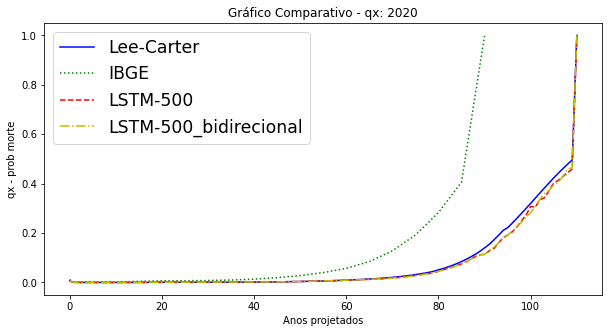

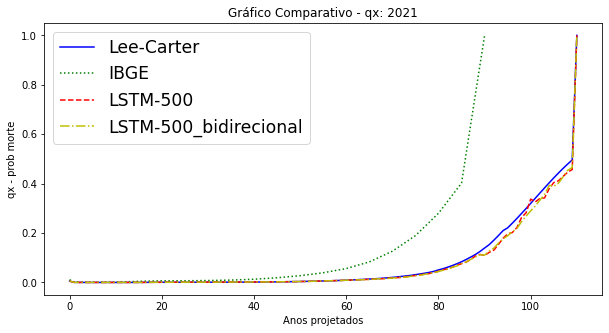

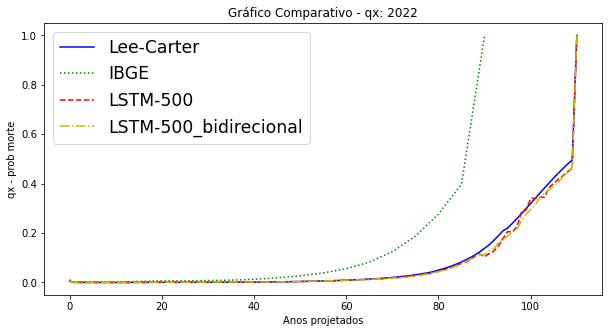

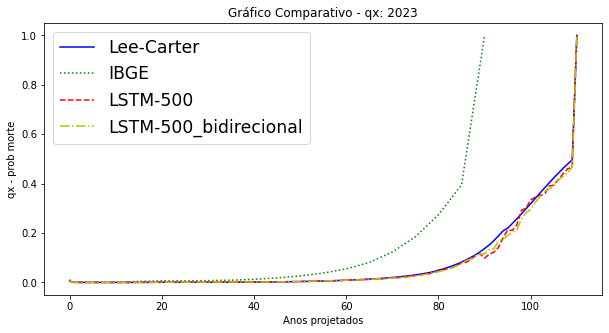

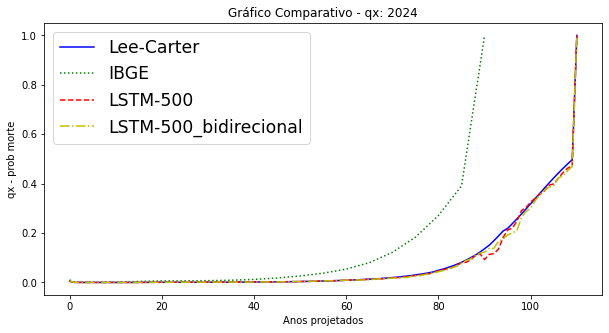

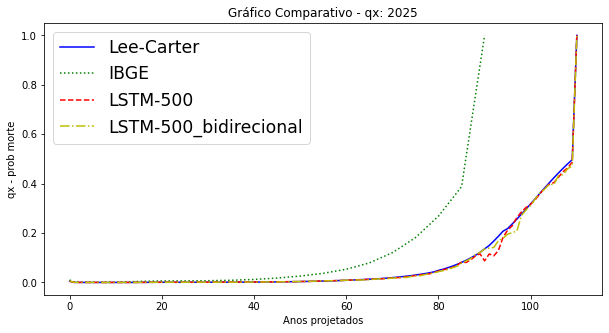

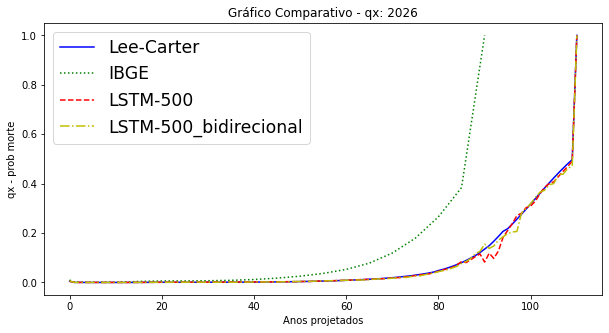

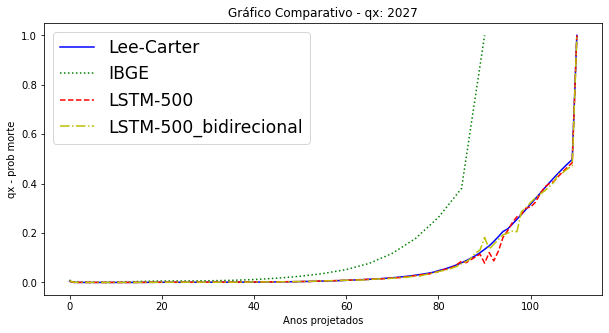

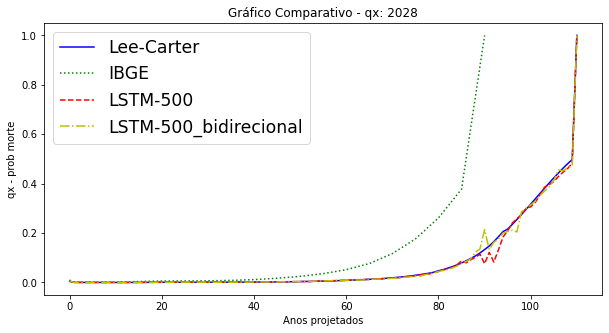

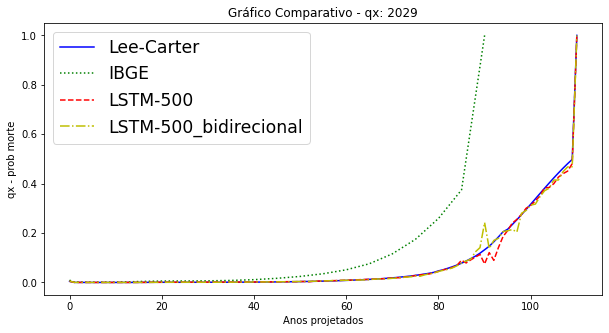

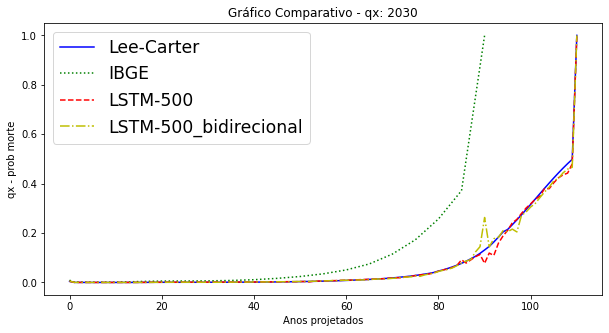

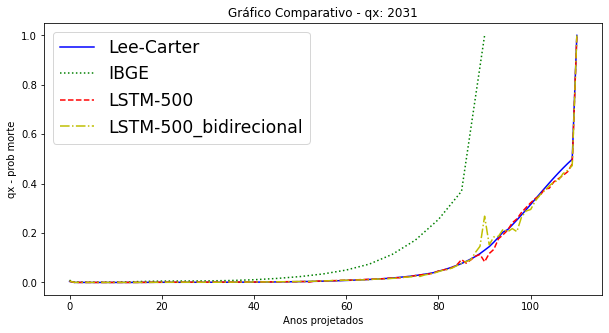

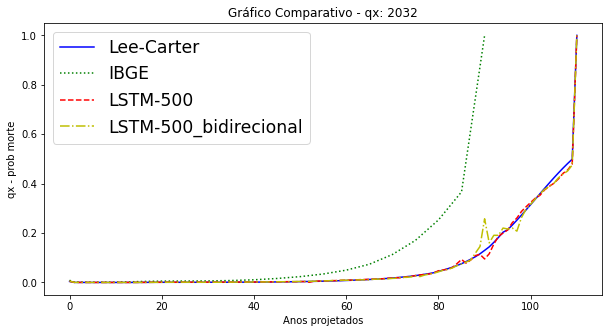

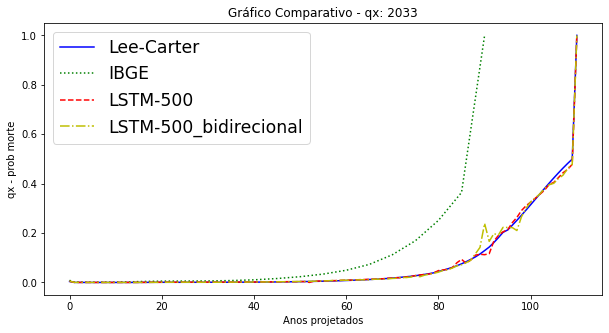

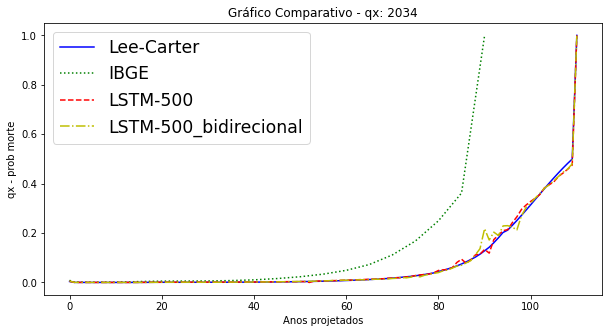

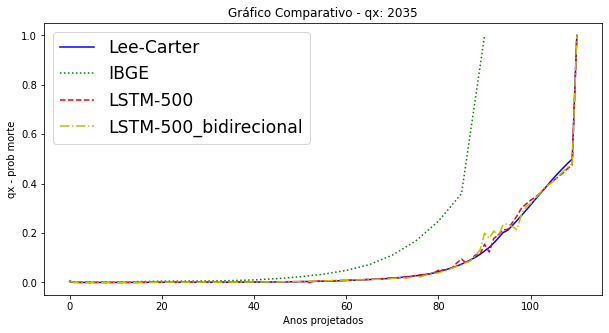

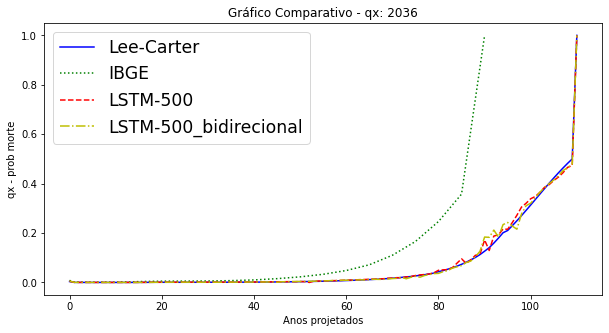

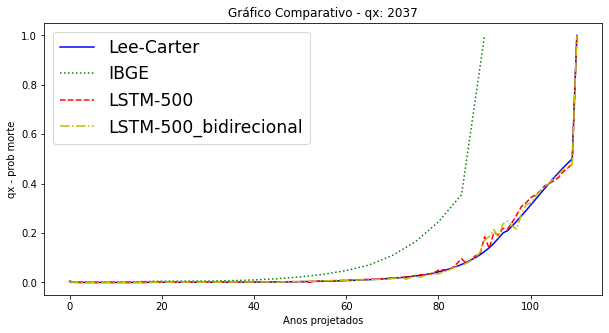

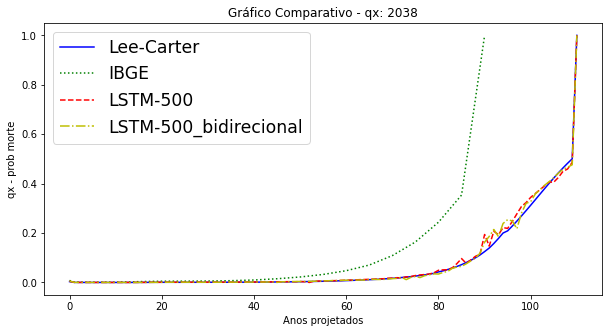

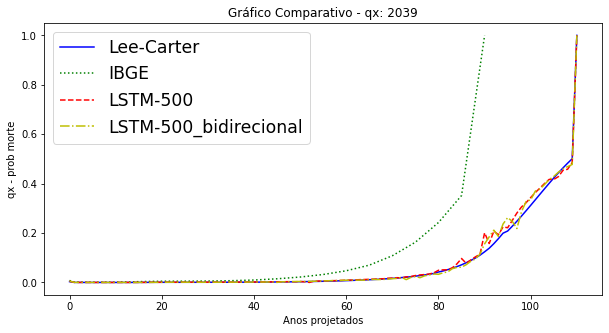

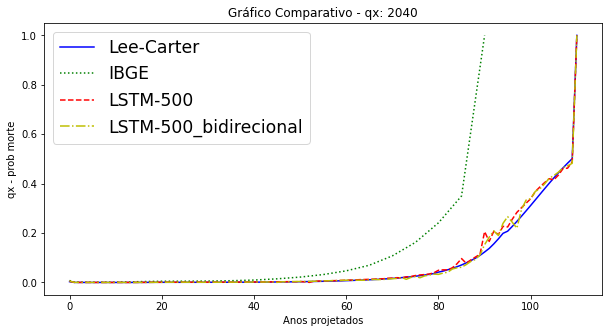

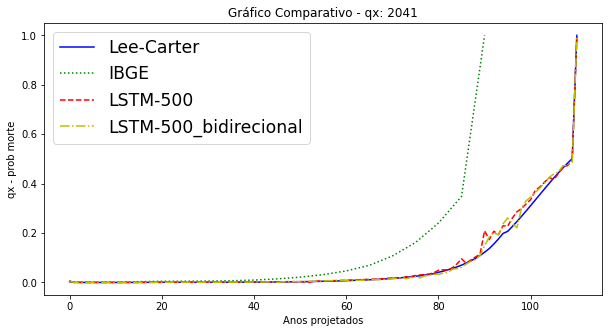

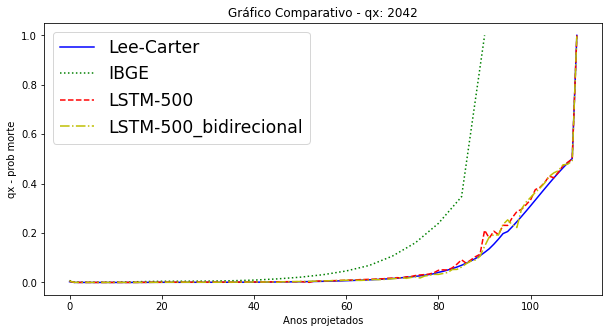

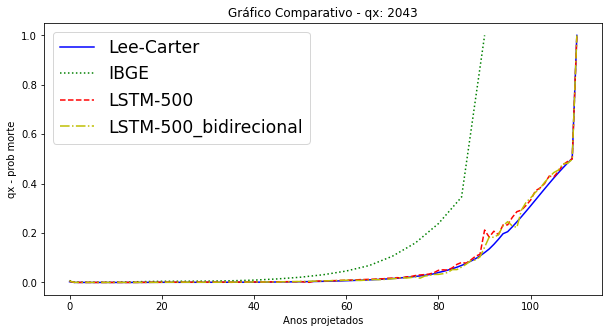

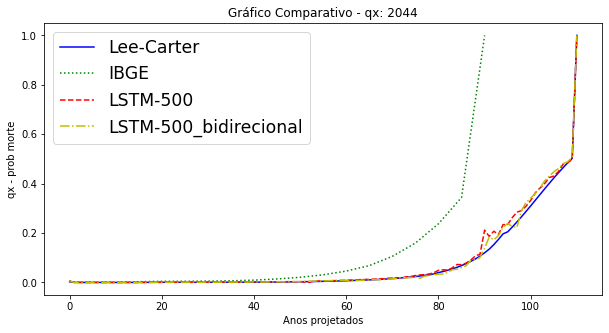

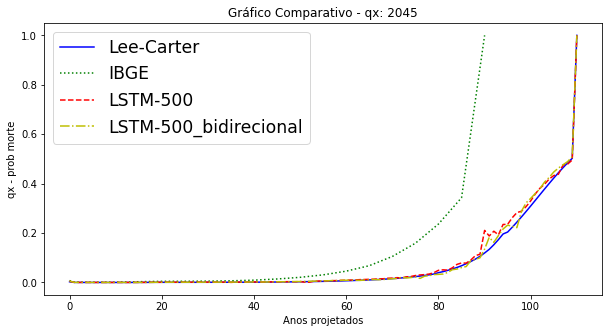

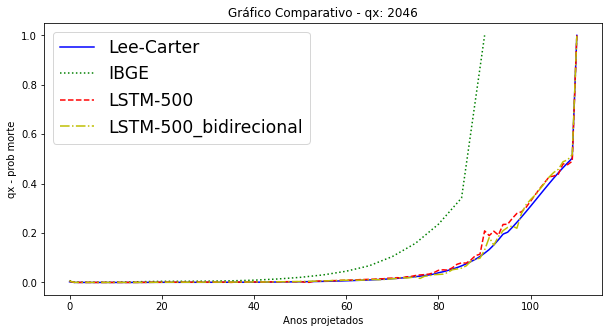

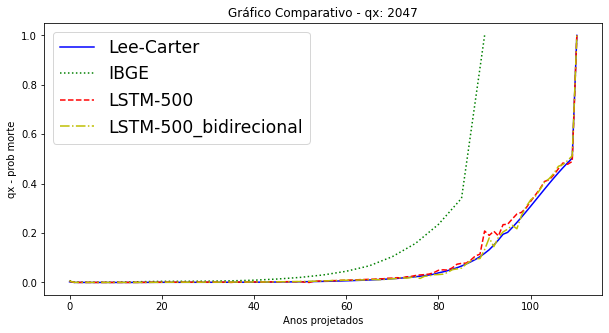

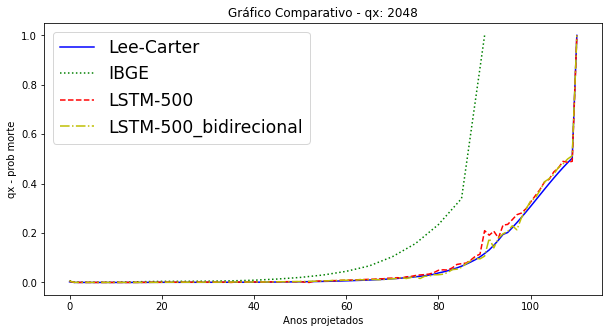

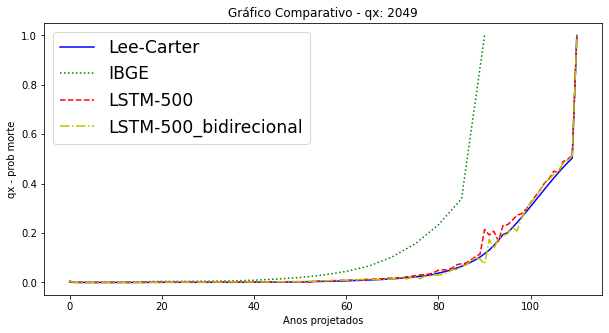

In [41]:
# Graficos
for ano in range(2020, 2050):
    fig = plt.figure(figsize=(10,5))
    ax = plt.subplot(111)
    ax.plot(df_leecarter.index, df_leecarter[str(ano)], color='b', linestyle='solid')
    ax.plot(df_ibge_qx_fim['Idade'], df_ibge_qx_fim[ano], color='g', linestyle='dotted')
    ax.plot(df_lstm500.index, df_lstm500[str(ano)], color='r', linestyle='dashed')
    ax.plot(df_lstm500_bidirecional.index, df_lstm500_bidirecional[str(ano)], color='y', linestyle='dashdot')
    ax.legend(loc='best', fontsize='xx-large', labels=['Lee-Carter', 'IBGE', 'LSTM-500', 'LSTM-500_bidirecional'])
    
    plt.title('Gráfico Comparativo - qx: %i' %ano)
    plt.xlabel('Anos projetados')
    plt.ylabel('qx - prob morte')

    plt.savefig(pasta_graficos + '/' + 'Comparativo dos métodos_qx'+str(ano)+'.png')

    plt.show()

#### 4.2 - Expectativa de Vida ao Nascer projetada para os anos de 2020 a 2050

* Para verificar as diferenças para a Expectativa de vida ao nascer.

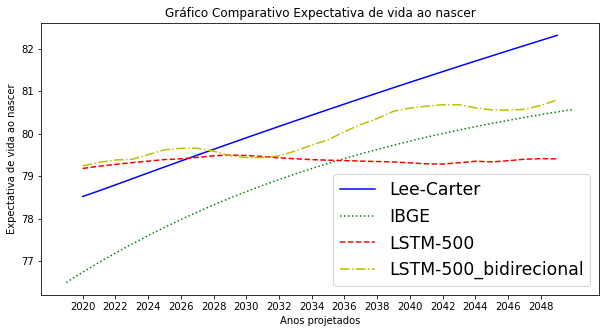

In [42]:
#Expectativa de vida ao nascer
fig = plt.figure(figsize=(10,5))
ax = plt.subplot(111)
ax.plot(df_leecarter0.ano, df_leecarter0.expx, color='b', linestyle='solid')
ax.plot(df_ibge_ex0.ano, df_ibge_ex0.ex, color='g', linestyle='dotted')
ax.plot(df_lstm0_500.ano, df_lstm0_500.expx, color='r', linestyle='dashed')
ax.plot(df_lstm0_500_bidirecional.ano, df_lstm0_500_bidirecional.expx, color='y', linestyle='dashdot')

ax.legend(loc='best', fontsize='xx-large', labels=['Lee-Carter', 'IBGE', 'LSTM-500', 'LSTM-500_bidirecional'])

plt.title('Gráfico Comparativo Expectativa de vida ao nascer')
plt.xlabel('Anos projetados')
plt.ylabel('Expectativa de vida ao nascer')

plt.xticks(range(2020, 2050, 2))

plt.savefig(pasta_graficos + '/' + 'Comparativo expectativa_vida_nascer.png')

plt.show()

 #### 4.3 - Log da Mortalidade geral por idade projetada para os anos de 2020 a 2050

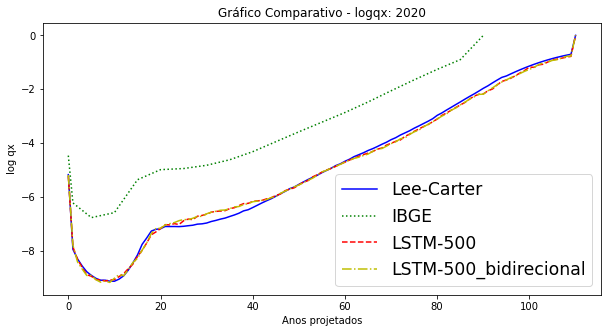

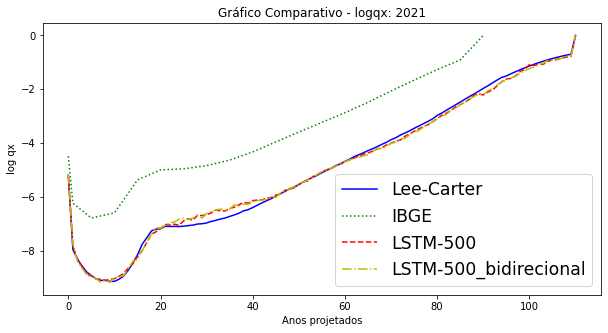

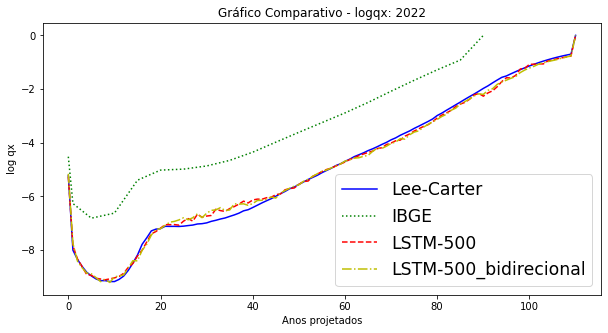

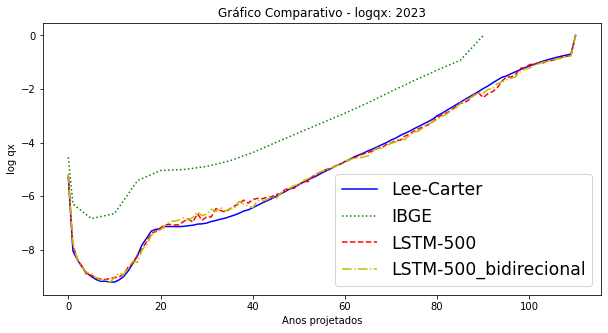

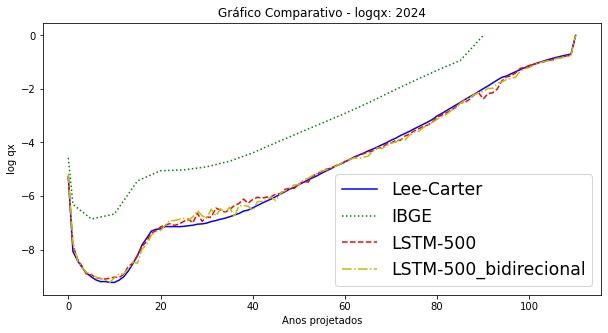

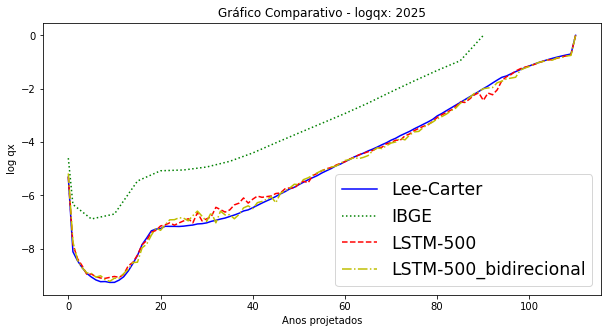

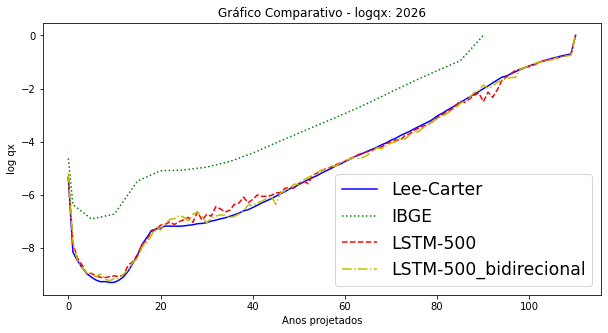

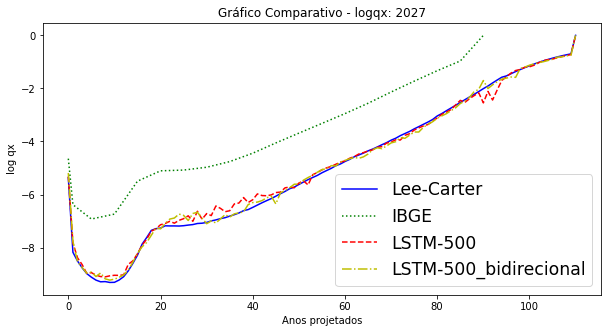

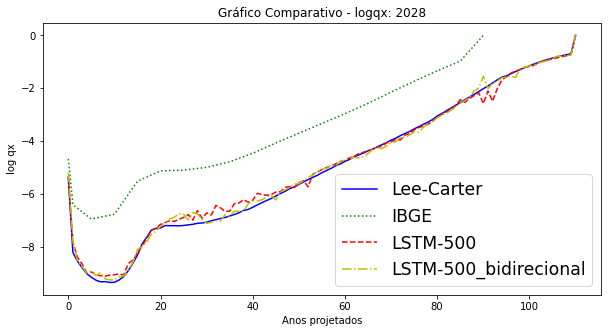

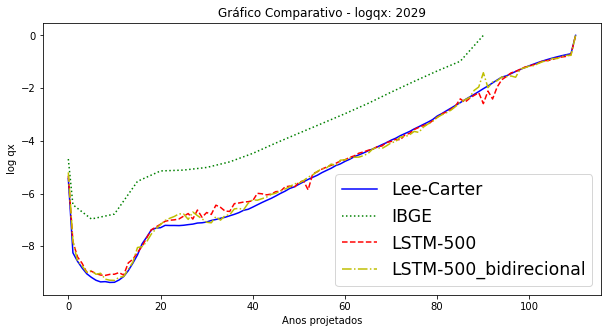

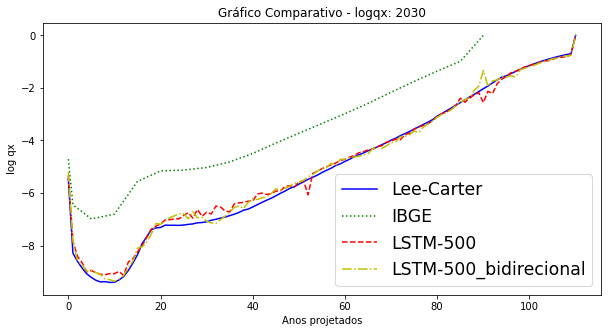

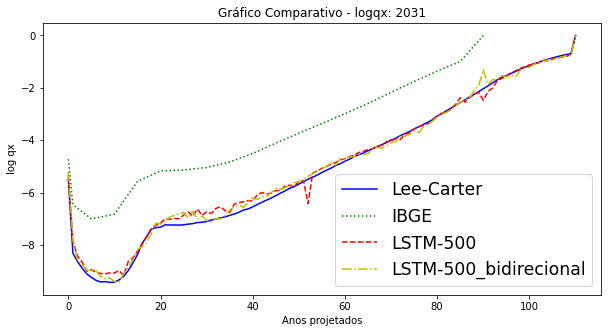

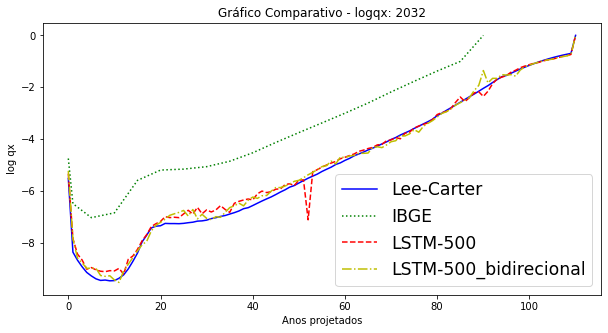

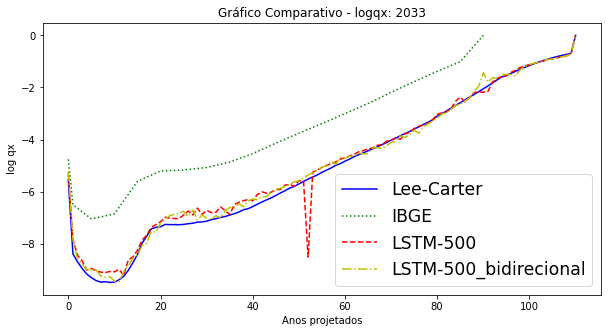

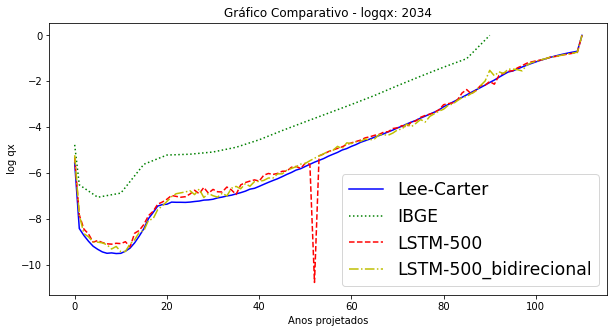

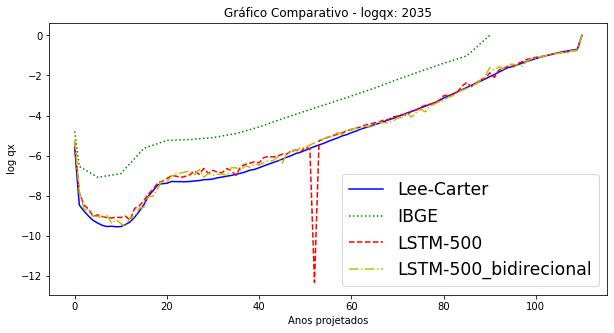

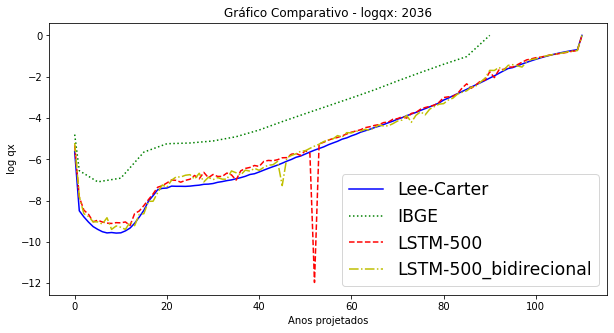

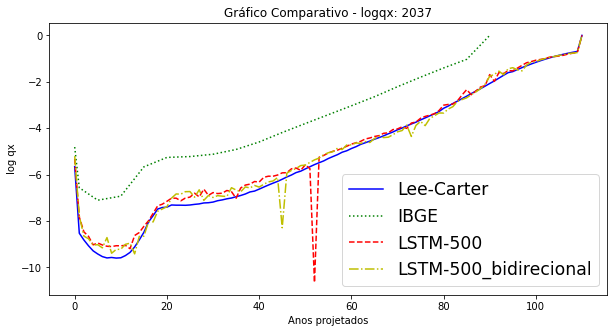

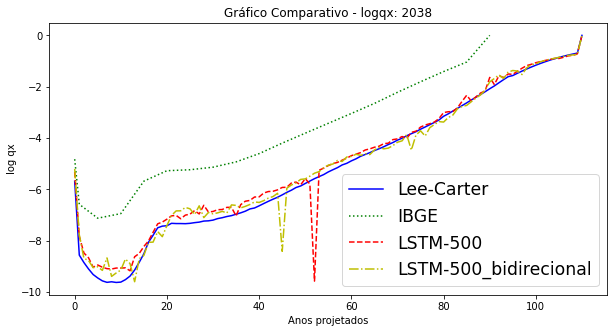

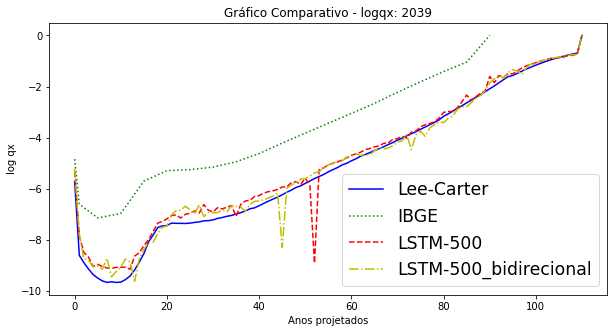

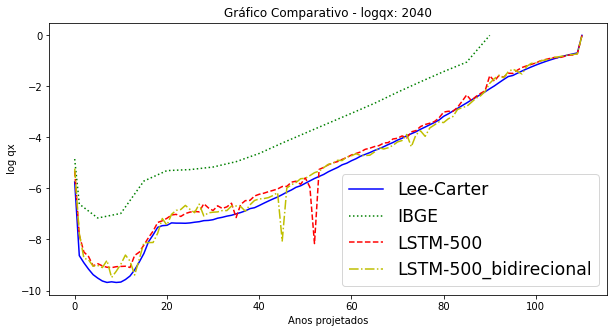

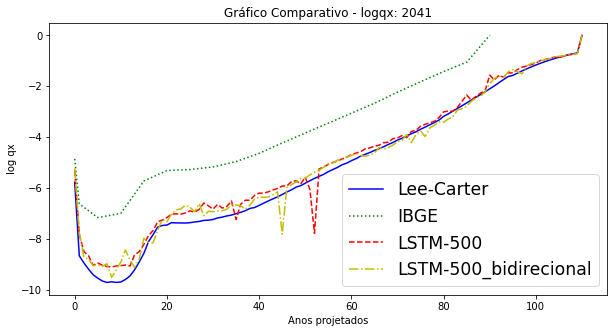

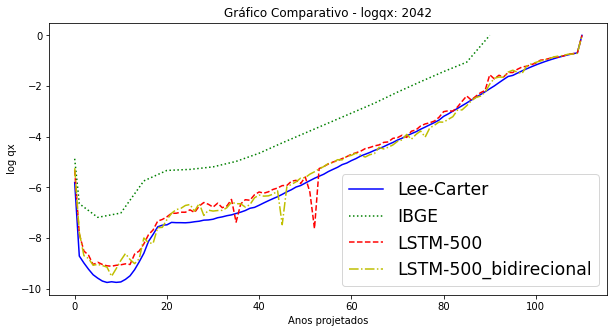

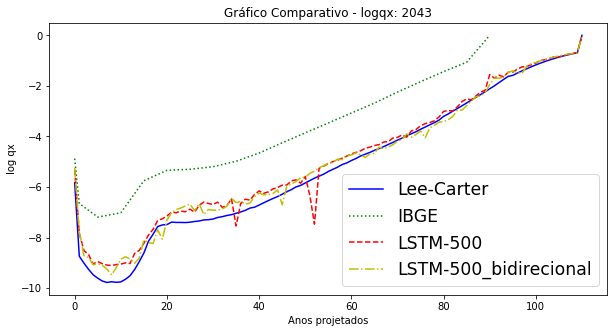

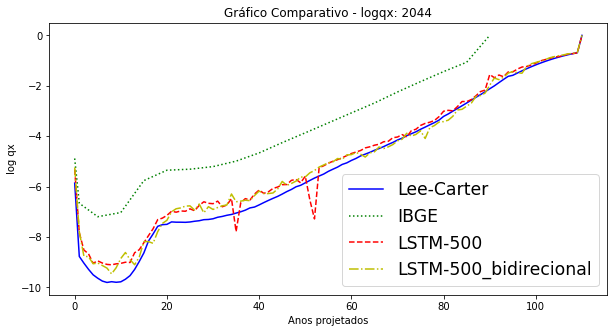

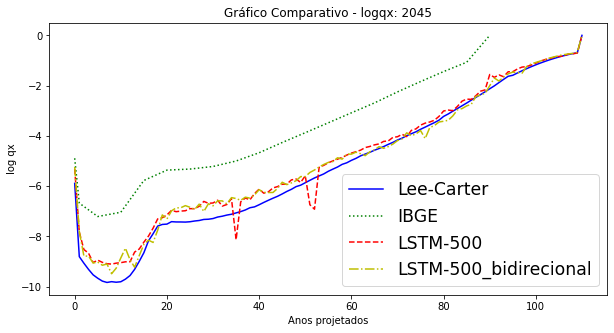

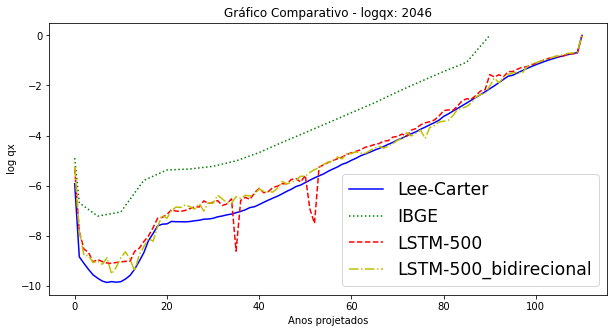

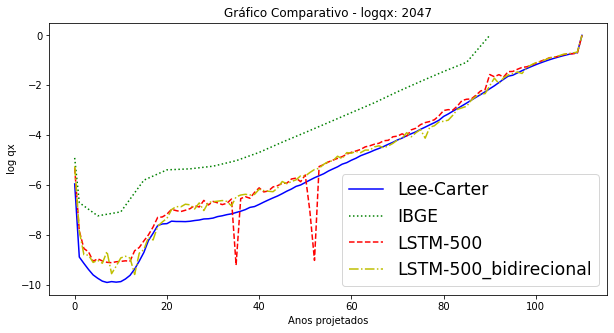

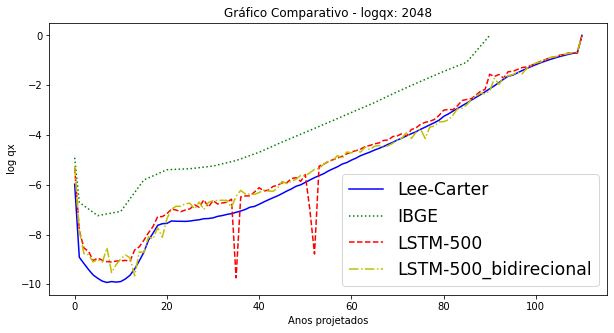

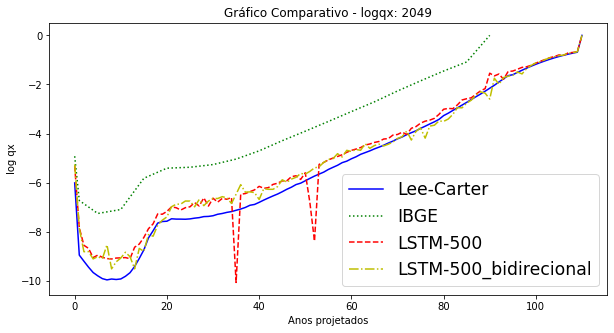

In [43]:
# Graficos
for ano in range(2020, 2050):
    fig = plt.figure(figsize=(10,5))
    ax = plt.subplot(111)
    ax.plot(df_leecarter.index, np.log(df_leecarter[str(ano)]), color='b', linestyle='solid')
    ax.plot(df_ibge_qx_fim['Idade'], np.log(np.array(df_ibge_qx_fim[ano], dtype=np.float)), color='g', linestyle='dotted')  
    ax.plot(df_lstm500.index, np.log(df_lstm500[str(ano)]), color='r', linestyle='dashed')
    ax.plot(df_lstm500_bidirecional.index, np.log(df_lstm500_bidirecional[str(ano)]), color='y', linestyle='dashdot')
    
    ax.legend(loc='best', fontsize='xx-large', labels=['Lee-Carter', 'IBGE', 'LSTM-500', 'LSTM-500_bidirecional'])
    
    plt.title('Gráfico Comparativo - logqx: %i' %ano)
    
    plt.xlabel('Anos projetados')
    plt.ylabel('log qx')
    
    plt.savefig(pasta_graficos + '/' + 'Comparativo_métodos_logqx'+str(ano)+'.png')
        
    plt.show()